# Unsupervised Learning Techniques

The computer scientist Yann LeCun famously said that "if intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cerry on top"

The most common unsupervised learning task is dimensionality reduction.  A few other common unsupervised tasks and algorithms include:

**Clustering**
    
    The goal is to group similar instances together into clusters.  Clustering is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more.

**Anomaly Detection**
    
    The objective is to learn what "normal" data looks like, and then use that to detect abnormal instances, such as defective items on a production line or a new trend in a time series.

**Density Estimation**
    
    This is the task of estimating the probability density function (PDF) of the random process that generated the dataset.  Density estimation is commonly used for anomaly detection: instances located in very low-density regions are likely to be anomolies.  It is also useful for data analysis and visualization.

## Clustering

Clustering is the take of identifying similar instances and assigning them to clusters, or groups of similar instances.  Just like in classification, each instance gets assigned to a group.  However, unlike classification, clustering is an unsupervised task.  Clustering is used in a wide variety of applications, including:

**For Customer Segmentation**

    You can cluster your customers based on their purchases and their activity on your website.  This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment.  For example, customer segmentation can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

**For Data Analysis**

    When you analyze a new dataset, it can be helpful to run a clustering algorithm and then analyze each cluster seperately.

**As a Dimensionality Reduction Technique**

    Once a dataset has been clustered, it is usually possible to measure each instance's affinity with each cluster (affinity is any measure of how well an instance fits into a cluster).  Each instance's feature vector x can then be replaced with the vector of its cluster affinites.  If there are k clusters, then this vector is k-dimensional.  This vector is typically must lower-dimensional than the original feature vector, but it can preserve enouhg information for further processing.

**For Anomaly Detection** ***Also called outlier detection***

    Any instance that has a low affinity to all the clusters is likely to be an anomaly.  For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second.  Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

**For Semi-Supervised Learning**

    If you only have a few labels, you can perform clustering and propagate the labels to all the instances in the same cluster.  This technique can greatly increase the number of labels availble for a subsequent supervised learning algorithm and thus improve performance.

**For Search Engines**

    Some search engines let you search for images that are similar to a reference image.  To build such a system, you would first apply a clustering algorithm to all the images in your database; similar images would end up in the same cluster.  Then when a user provides a reference image, all you need to do is use the trained clustering model to find this image's cluster, and you can then simply return all the images from this cluster.

**To Segment an Image**

    By clustering pixels according to their color, then replacing each pixel's color with the mean color of its cluster, it is possible to considerably reduce the number of different colors in an image.  Image segmentation is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.

## K-Means

The K-Means algorithm is a simple algorithm capable of clustering very quickly and efficiently, often in just a few iterations.  Essentially, it will try to find each blob's center and assign each instance to the closest blob.  Note that you have to specify the number of clusters ***k*** that the algorithm must find.  In some cases it is pretty obvious from looking at the data what ***k*** should be but in general it is not that easy.

In the context of clustering, an instance's <i> label </i> is the index of the cluster that this instance gets assigned to by the algorithm: this is not to be confused with the class labels in classification.  The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the **labels_** instance variable. It also preserves the centroids via the **cluster_centers_** instance variable.

#### Example 1: Making Predictions with KMeans

[2 2 1 2 4 1 3 4 2 4] 
 [[-2.52542719  9.03588992]
 [-6.73463698 -6.82857331]
 [ 4.61752241  1.94093023]
 [-8.82703304  7.38187735]
 [ 2.02010095  4.25316462]]


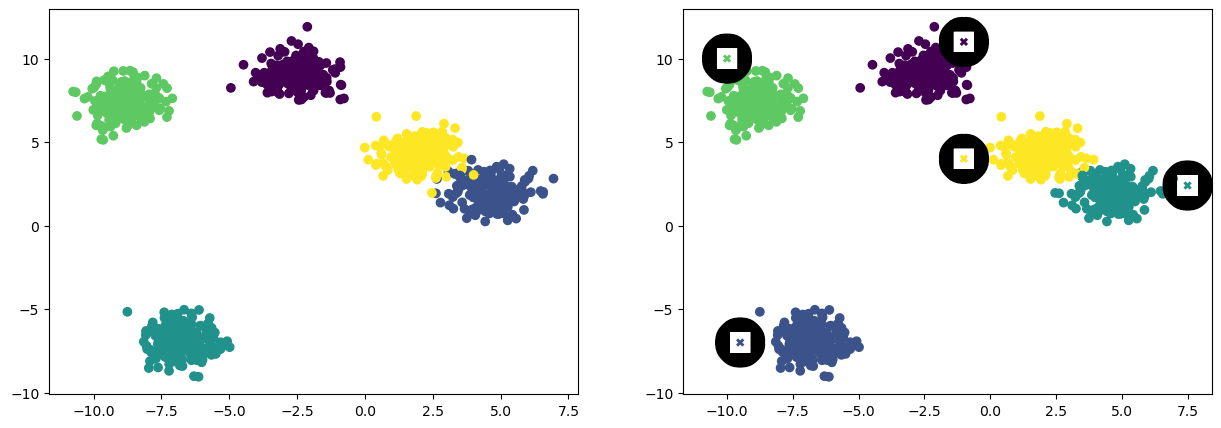

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=0.75, random_state=42)
colors = ['red', 'blue', 'green', 'yellow', 'black']

k = 5
kmeans = KMeans(n_clusters=k, n_init=20)
y_pred = kmeans.fit_predict(X)

X_new = np.array([[-9.5, -7], [-1, 4], [-1.0, 11], [-10, 10], [7.5, 2.4]])
X_new_preds = kmeans.predict(X_new)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.scatter(X[:, 0], X[:, -1], c=y)
ax1.scatter(X[:, 0], X[:, -1], c=y_pred)
ax1.scatter(X_new[:, 0], X_new[:, -1], c=X_new_preds, marker='X', linewidth=30, edgecolor='black')
plt.close()

print(kmeans.labels_[0:10], '\n', kmeans.cluster_centers_)
fig

The K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.  Instead of assigning each instance to a single cluster, which is called ***hard clustering***, it can be useful to give each instance a score per cluster, which is called ***soft clustering***.  The score can be the distance between the instance and centroid; conversely, it an be a similarity score (or affinity), such as the Gaussian Radial Basis Function introduced in Chapter 5.  In the KMeans class, the transform() method measures the distance from each instance to every centroid.  

If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

In [2]:
kmeans.transform(X_new)

array([[17.48697891,  2.77067135, 16.71061556, 14.39761372, 16.1042367 ],
       [ 5.26185475, 12.25332858,  5.98300312,  8.52640257,  3.03069333],
       [ 2.48689697, 18.72816295, 10.65942321,  8.62283351,  7.39194138],
       [ 7.53649434, 17.1424466 , 16.6919312 ,  2.86887045, 13.32324824],
       [12.02265467, 16.96441733,  2.91880491, 17.0701819 ,  5.78476558]])

### The K-Means Algorithm

How does the algorithm work?  You are given neither the labels nor the centroids.

1. Start by placing the centroids randomly by picking ***k*** instances at random and using their locations as centroids.
2. Label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.
3. The algorithm is guarenteed to converge in a finite number of steps.

The computational complexity of the algorithm is generally linear with regard to the number of instances ***m***, the number of clusters ***k***, and the number of dimensions ***n***.  However, this is only true when the data has a clustering structure.  The worse case scenario complexity can increase exponentially with the number of instances ***m***.  In practice, this rarely happens, and K-Means is generally one of the fastest clustering algorithms.

Although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e. it may converge to a local optimum).  Let's look at a few ways to mitigate thsi risk by improving the centroid initialization.

### Centroid Initialization Methods

If you happen to know approximately where the centroids should be (e.g., if you ran another clustering algorithm earlier), then you can set the ***init*** hyperparameter to a NumPy array containing the list of centroids, and set ***n_init*** to 1.  Another solution is to run the algorithm multiple times with different random intializations and keep the best solution.  The number of random initializations is controlled by the ***n_init*** hyperpameter: by default, it is equal to 10, which means that the whole algorithm decscribed earlier runs 10 times when you call ***fit()***, and Sklearn keeps the best solution.

Which solution is the best?  To determine, use a performance metric!  That metric is called the model's *inerita*, which is the mean squared distance between each instance and its closest centroid.  The KMeans class runs the algorithm ***n_init*** times and keeps the model with the lowest inertia.

An important improvement to the K-Means algorithm, K-Means++, was proposed in a 2006 paper.  Thye introduced a smarter initialization step that tends to select centroids that are distant from one another.  The KMeans class uses this initialization method by default.  If you want to force it to use the original method then you can set the ***init*** hyperparameter to 'random'.  You will rarely need to do this.

In [3]:
print(kmeans.inertia_, kmeans.score(X))

1083.5394352833828 -1083.5394352833828


### Accelerated K-Means and mini-batch K-Means

Another important improvement to the K-Means algorithm was proposed in a 2003 paper.  It considerably accelerates the algorithm by avoiding many unnecessary distance calculations.  This is the algorithm the KMeans class uses by default but you can force it use the original algorithm by setting the ***algorithm*** hyperparameter to 'full', although you probably will never need to.

Yet another important variant of the K-Means algorithm was proposed in a 2010 paper.  Instead of using the full dataset at each iteration, the algorithm is capable of using min-batches, moving the centroids just slightly at each iteration.  Scikit-Learn implements this algorithm in the MiniBatchKMeans class.  You can just use this class like the KMeans class.

If the dataset does not fit in memory, the simplest option is to use the memmap class as we did for incremental PCA in chapter 8.  Alternatively, you can pass one mini-batch at a time to the ***partial_fit()*** method, but this will require much more work, since you will need to perform multiple initializations to select the best one yourself.

Although the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increases.

In [4]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=10)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=10)

### Finding the Optimal Number of Clusters

In general it will not be so easy to know how to set ***k***, and the result might be quite bad if you set it to the wrong value.  *Inertia* is not a good performance metric when trying to choose ***k*** because it keeps getting lower as we increase ***k***.  If you iterate over different values of ***k*** and plot the *inertia* the chart will resemble an elbow.  The joint of the elbow is a decent approximation for the optimal ***k*** but this techinque for choosing the best value for the number of clusters is rather coarse.

A more precise approach (but also more computationally expensive) is to use the *silhouette score*, which is the mean *silhouette coefficient* over all the instances.  An instance's silhouette coefficient is equal to:

$$ (b - a) / max(a, b) $$

where *a* is the mean distance to the other instances in the same cluster and *b* is the mean nearest-cluster distance.  The silhouette coefficient can vary between -1 and 1.  A coefficient close to 1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

To compute the silhouette score you can use Scikit-Learn's ***silhouette_score()*** function.

An even more informative visualization is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.  This is called a *silhouette diagram*.  The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).  The dashed line indicates the mean silhouette coefficient.  The vertical dashed lines represent the silhouette score for each number of clusters.  When most of the instances in a clsuter have a lower coefficient than this score then the cluster is rather bad since this means its instances are much too close to other clusters.  When all clusters have similar sizes it represents an optimum or near-optimum value for ***k***.

In [5]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.7478726697646428

#### Example 2: Silhouette Diagram

For n_clusters = 2 The average silhouette_score is : 0.6049909209650111
For n_clusters = 3 The average silhouette_score is : 0.729101274541782
For n_clusters = 4 The average silhouette_score is : 0.7755509396697978
For n_clusters = 5 The average silhouette_score is : 0.7478629295273104
For n_clusters = 6 The average silhouette_score is : 0.655382407251414


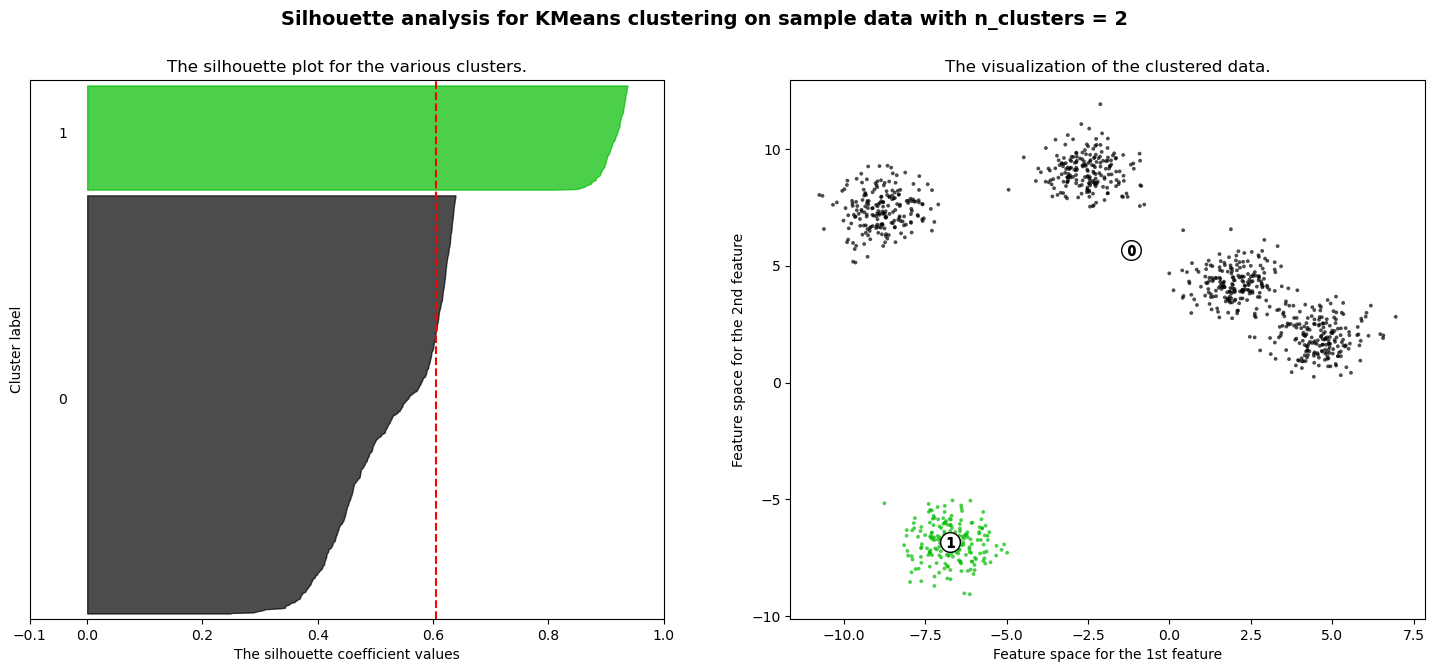

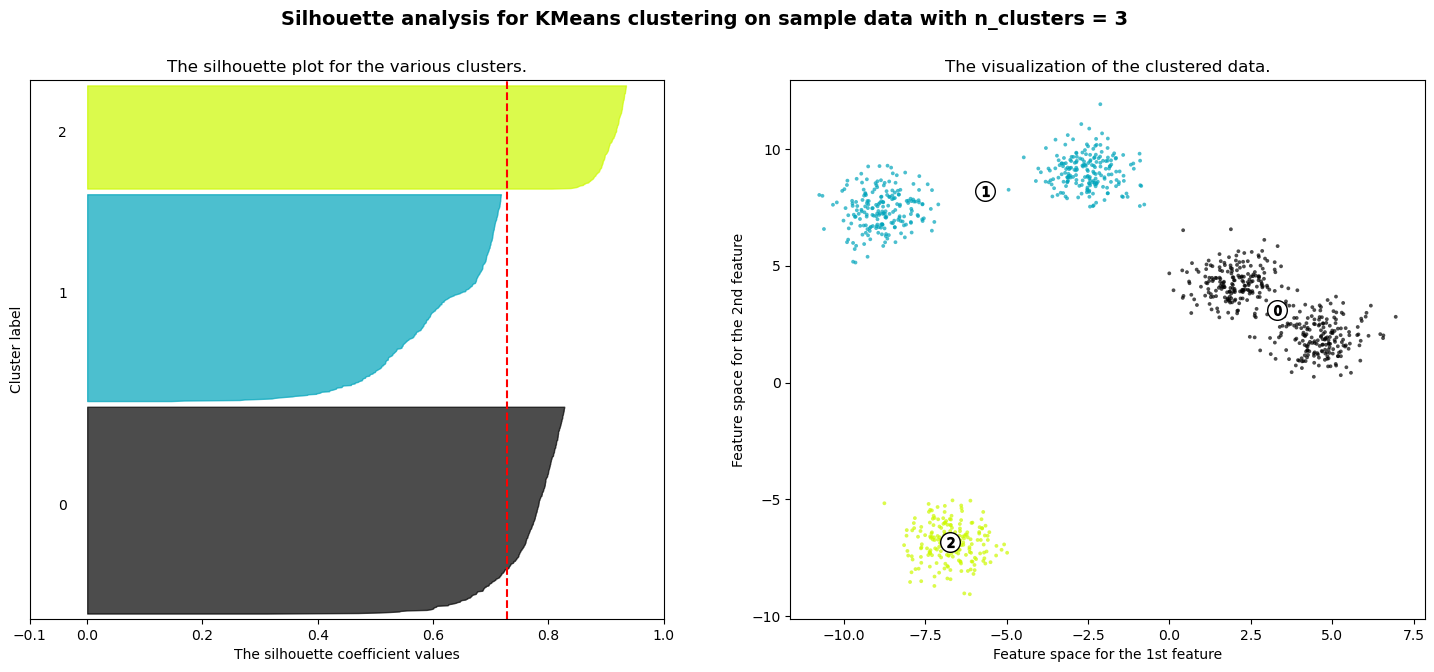

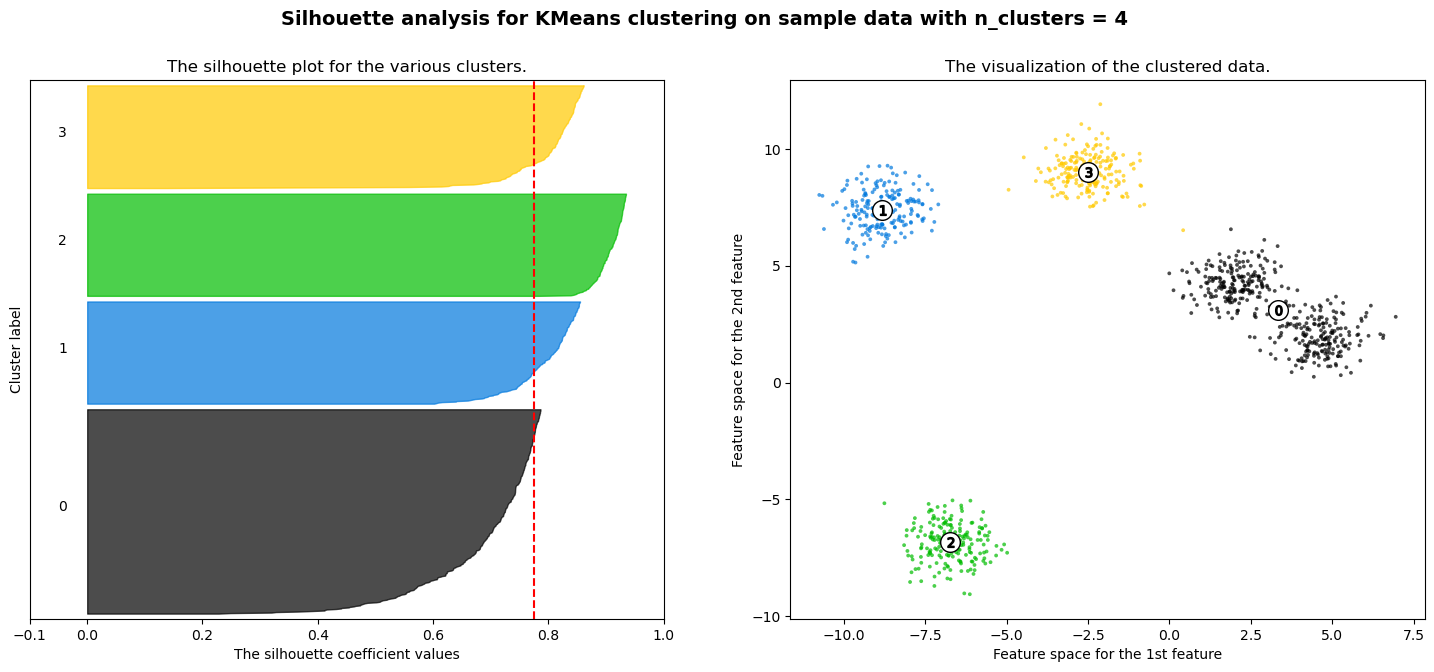

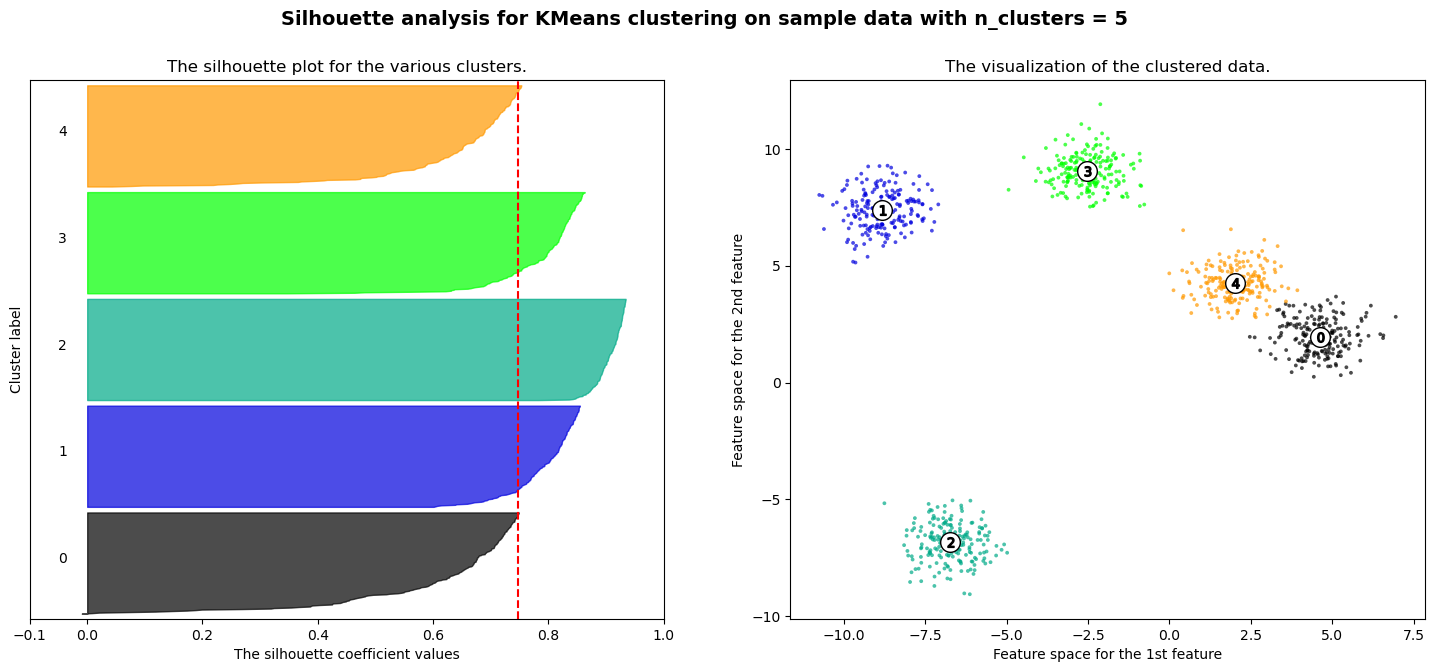

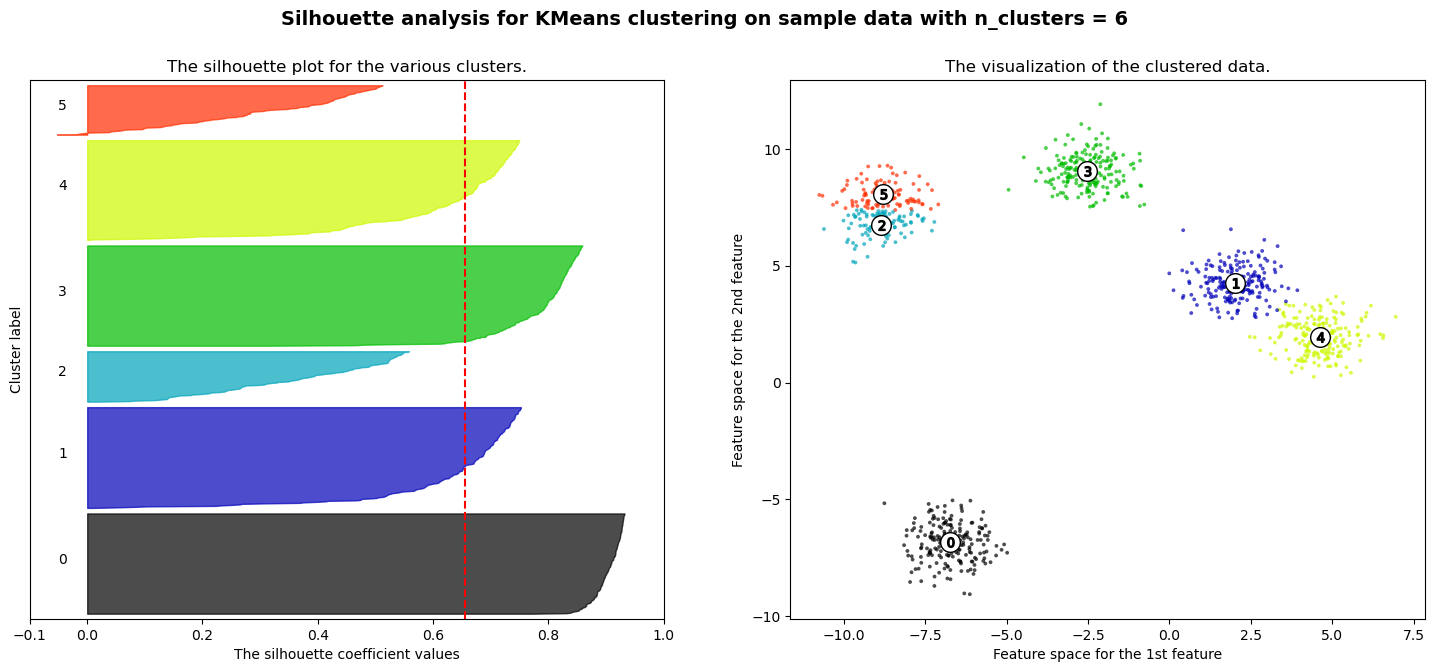

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1) * 10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Limits of K-Means

Despite its many merits, K-Means is not perfect.  It is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters.  Moreover, K-Means does not behave very well when the clusters have varying sizes, different densitites, **or nonspherical** shapes.  On these types of elliptical clusters, Gaussian mixture models work great.

It is important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.

### Using Clustering for Image Segmentation

*Image segmentation* is the task of partitioning an image into multiple segments.  In *semantic segmentation*, all pixels that are part of the same object type get assigned to the same segment.  For example, in a self-driving car's vision system, all pixels that are part of a pedestrian's image might be assigned to the 'pedestrian' segment (there would be one segment containing all the pedestrians).  In *instance segmentation*, all pixels that are part of the same individual object are assigned to the same segment.  In this case there would be a different segment for each pedestrian.  The state of the art in semantic or instance segmentation today (as of 2019) is achieved using complex architectures based on convolutional neural networks (Chapter 14).

*Color segmentation* is much simpler: assign pixels to the same segment if they have a similar color.

#### Example 3: Color Segmentation

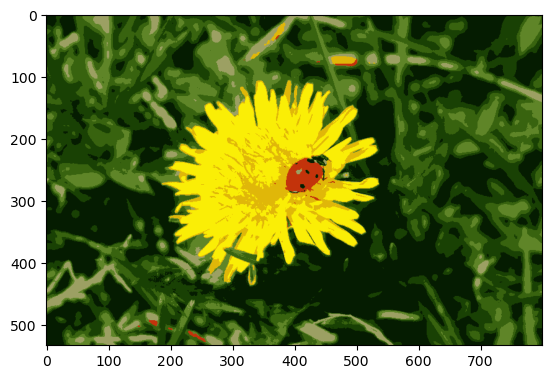

In [7]:
from matplotlib.image import imread

image = imread('ladybug.png')
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

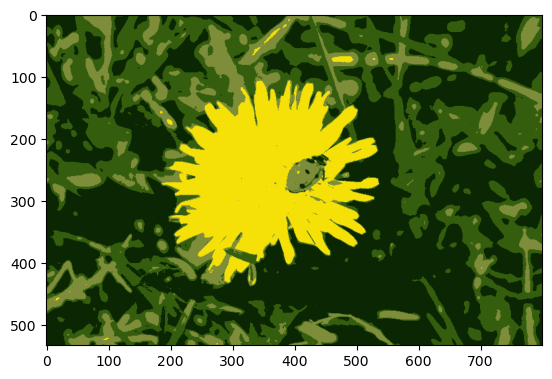

In [8]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

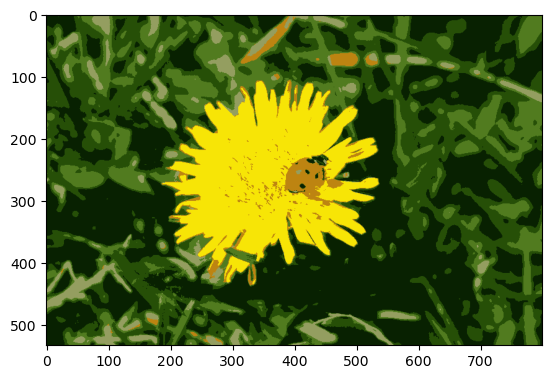

In [9]:
kmeans = KMeans(n_clusters=6, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

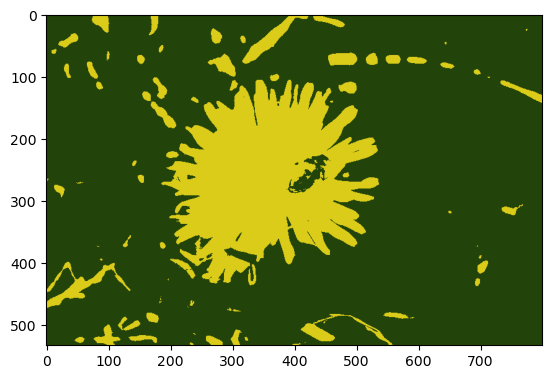

In [10]:
kmeans = KMeans(n_clusters=2, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img)

### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm.  **When K-Means is just a preprocessing step in a classification pipeline, finidng a good value for ***k*** is much simpler.  Simply use ***k*** that results in the best classification performance during cross-validation**

#### Example 4: Dimensionality Reduction Using KMeans

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load and split the data
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Train a logistic regression model to compare against
log_reg = LogisticRegression(solver='newton-cholesky')
log_reg.fit(X_train, y_train)
print(log_reg.score(X_test, y_test))

# Create a Pipeline that clusters the dataset before training a logistic regression model
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, n_init=10)),
    ('log_reg', LogisticRegression(solver='newton-cholesky'))
])
pipeline.fit(X_train, y_train)
print(pipeline.score(X_test, y_test))

# Finally, use grid search to optimize k
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs= -1)
grid_clf.fit(X_train, y_train)
print(grid_clf.best_params_, grid_clf.score(X_test, y_test))

0.9688888888888889
0.9755555555555555
Fitting 3 folds for each of 98 candidates, totalling 294 fits
{'kmeans__n_clusters': 98} 0.9777777777777777


### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.  First, cluster the training set.  Then, for each cluster, find the instance closest to the centroid.  We will call these *representative instances*.  Extract these instances from the dataset and manually label them.  Instead of being random instances, each of them is a representative instance of its cluster. Train the model only on these datapoints and see if there's a performance boost.  

Likewise, *label propagation* is when you propagate these labels to all the other instances in the same cluster.  However, the problem is that we propagated each representative's instance's label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likley to be mislabeled.  Let's see what happens if we only propagate the labels to the 20% of the instances that are closest to the centroids.

#### Example 5: Representative Instances and Label Propagation

In [12]:
# Load and split the data
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Perform a log regression on a subset of the training set and observe its accuracy
n_labeled = 50
log_reg = LogisticRegression(max_iter=int(1e5), random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

print('Log Regression Accuracy on Random Subset: ', round(log_reg.score(X_test, y_test), 3))

# Cluster the training set into 50 clusters.  For each cluster find the image closest to the centroid to act as the representative images
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

# Visualize the representative images to help with labelling
def reshape_image(digit: np.array) -> np.array:
    return digit.reshape(8, 8)

fig, axs = plt.subplots(nrows=5, ncols=10, sharex=True, sharey=True, figsize=(5,3))
for i, ax in enumerate(fig.axes):
    ax.imshow(reshape_image(X_representative_digits[i]), cmap='gray', interpolation='nearest')

plt.tight_layout()
plt.close()

# Manually label the targets
y_representative_digits = np.array([
    3, 8, 5, 1, 0, 4, 6, 7, 1, 2,
    4, 5, 9, 9, 6, 2, 1, 7, 2, 8,
    6, 7, 9, 2, 0, 9, 2, 5, 4, 5,
    0, 7, 1, 3, 7, 1, 1, 8, 4, 3,
    7, 4, 5, 3, 3, 9, 1, 3, 6, 8
    
])

# Now train a new model using this representative dataset and see how well it compares.
log_reg = LogisticRegression(max_iter=int(1e5), random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

print('Log Regression Accuracy on Representative Subset: ', round(log_reg.score(X_test, y_test), 3))

# Now propagate these labels to all of the other instances in the same cluster.
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

# Train the model again and compare performance
log_reg = LogisticRegression(max_iter=int(1e5), random_state=42)
log_reg.fit(X_train, y_train_propagated)

print('Log Regression Accuracy on Propagated Targets: ', round(log_reg.score(X_test, y_test), 3))

# Instead of propagating the whole dataset which will likely mislabel some boundary values, propagate to the 20% closest to the centroids
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

# Finally, trian a model on this modified subset and compare results
log_reg = LogisticRegression(max_iter=int(1e5), random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

print('Log Regression Accuracy on Partially Propagated Targets: ', round(log_reg.score(X_test, y_test), 3))

# How close are the propagated labels to the actuals?
print('Propagated Label Accuracy: ' , round(np.mean(y_train_partially_propagated == y_train[partially_propagated]), 2))

Log Regression Accuracy on Random Subset:  0.822
Log Regression Accuracy on Representative Subset:  0.889
Log Regression Accuracy on Propagated Targets:  0.88
Log Regression Accuracy on Partially Propagated Targets:  0.904
Propagated Label Accuracy:  0.96


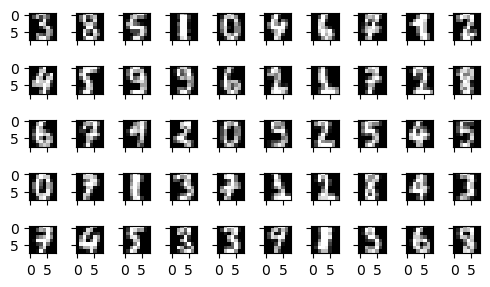

In [13]:
fig

### Active Learning

To continue improving your model and your training set, the next step could be to do a few rounds of *active learning*, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them.  Follow these steps:

1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on all the unlabeled instances.
2. The instances for which the model is most uncertain (i.e. when its estimated probability is lowest) are given to the expert to be labeled.
3. You iterate this process until the performance improvement stops being worth the labeling effort.

### DBSCAN

This algorithm defines clusters as continuous regions of high density.

1. For each instance, the algorithm counts how many instances are located within a small distance $\epsilon$ from it.  This region is called the instance's $\epsilon - neighborhood$
2. If an instance has at least min_samples instances in its $\epsilon - neighborhood$ (including itself), then it is considered a *core instance*.  In other words, core instances are those that are located in the dense regions.
3. All instance in the neighborhood of a core instance belong to the same cluster. This neighborhood may inlude other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
4. Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

**This algorithm works well if all the clusters are dense enough and if they are well separated by low-density regions**

When using Scikit-Learns DBSCAN class, if an instance have a cluster index equal to -1 then that instance is considered as an anomoly.  

Somewhat surprisingly, the DBSCAN class does not have a predict() method, although it has a fit_predict() method.  In other words, **it cannot predict which cluster a new instance belongs to**.  In this regard it can almost be thought of as a preprocessing step for other classifiers.

In short, **DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape.  It is robust to outliers, and it has just two hyperparameters: eps and min_samples.  If the density varies significantly across the clusters, however, it can be impossible for it to capture all the clusters properly.  Its computational complexity is roughly O(m log m), but Scikit-Learn's implementation can require up to O($m^{2}$) memory if eps is large.**

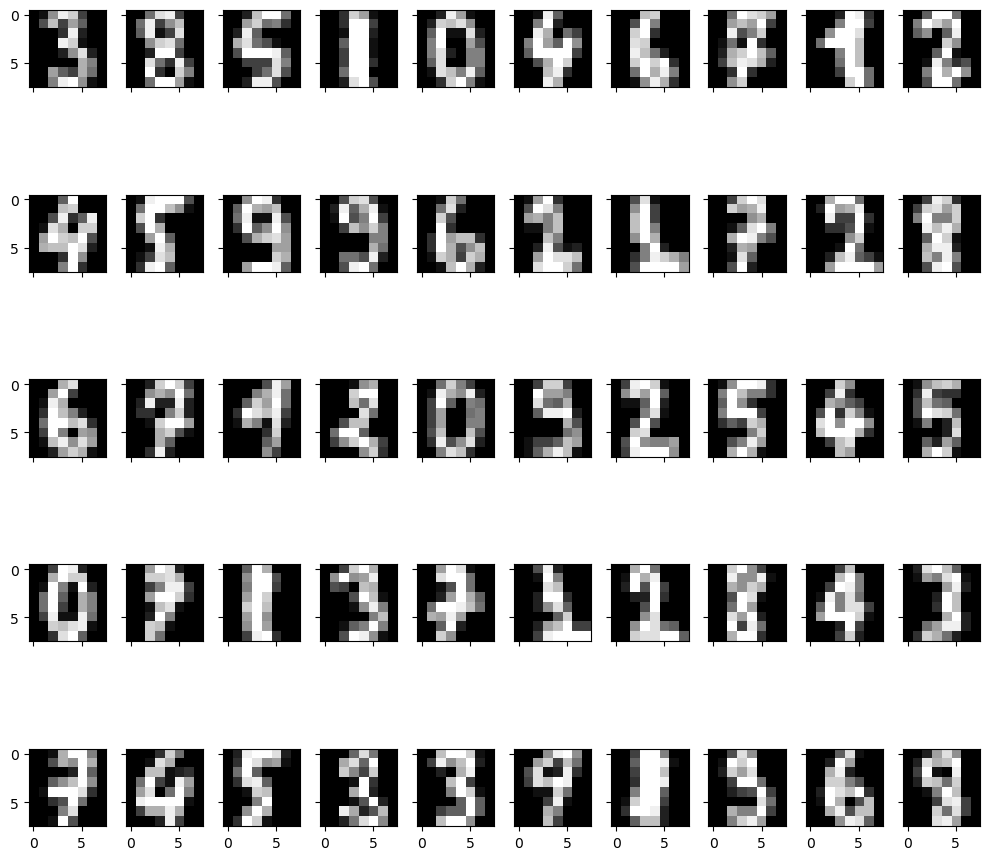

In [14]:
def reshape_image(digit: np.array) -> np.array:
    return digit.reshape(8, 8)

fig, axs = plt.subplots(nrows=5, ncols=10, sharex=True, sharey=True, figsize=(10,10))
for i, ax in enumerate(fig.axes):
    ax.imshow(reshape_image(X_representative_digits[i]), cmap='gray', interpolation='nearest')

plt.tight_layout()
plt.close()
fig

In [15]:
reshape_image(X_representative_digits[0])

array([[ 0.,  1.,  9., 15., 13.,  4.,  0.,  0.],
       [ 0.,  5., 12.,  4., 10.,  6.,  0.,  0.],
       [ 0.,  0.,  0.,  3., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0., 15., 13.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  9., 14.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 11.,  8.,  0.],
       [ 0.,  0., 10.,  6.,  4., 11.,  7.,  0.],
       [ 0.,  0.,  8., 15., 16.,  9.,  1.,  0.]])

#### Example 6: DBSCAN

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

print(dbscan.labels_[0:10], dbscan.core_sample_indices_[0:10], dbscan.components_[0:10])

[0 0 1 0 1 1 0 1 1 1] [0 1 2 3 4 5 6 7 8 9] [[ 0.09934009 -0.03883603]
 [ 0.8133487  -0.49408134]
 [-0.21489893  0.92455098]
 [ 0.03893645 -0.1187614 ]
 [-0.93267874  0.38479982]
 [-0.1077584   0.91217031]
 [ 1.91156953 -0.06240499]
 [ 0.30647413  1.10789873]
 [-0.86430208  0.27608229]
 [-0.7282905   0.63094856]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

# Note that we only trained the classifier on the core instances,
# But we could also have chosen to train it on all the instances,
# or all but the anomalies
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new), knn.predict_proba(X_new)

(array([1, 0, 1, 0], dtype=int64),
 array([[0.12, 0.88],
        [1.  , 0.  ],
        [0.2 , 0.8 ],
        [1.  , 0.  ]]))

### Other Clustering Algorithms

Scikit-Learn implements several more clustering algorithms that are worth being familiar with:

1. *Agglomerative Clustering* <br>
    Think of many tiny bubbles floating on water and gradually attaching to each other until there's one big group of bubbles.  This approach scales very well to large numbers of instances or clusters.  **It can capture clusters of various shapes, it produces a flexible and informataive cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance**.  It can scale nicely to large numbers of instances if you provide a connectivity matrix, which is a sparse m x m matrix that indicates which pairs of instances are neighbors.  Without a connectivity matrix, the algorithm does not scale well to large datasets. <br><br>
2. *BIRCH* <br>
    Designed specifically for very large datasets and it can be faster than batch K-Means with simliar results, as long as the number of features is not too large (< 20) <br><br>
3. *Mean-Shift* <br>
    This algorithm starts by placing a circle centered on each instance; then for each cirlce it computes the mean of all the instances located within it, and it shifts the circle so that it is centered on the mean.  Mean-Shift shifts the cirlces in the direction of higher density, until each of them has found a local density maximum.  Finally, all the instances whose circles have settled in the same place (or close enough) are assigned to the same cluster.  Unfortunately, its computational complexity is O($m^{2}$), so **it is not suited for large datasets** <br><br>
4. *Affinity Propagation* <br>
    This algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converges, each representative and its voters form a cluster.  Affinity propagation can detect any number of clusters of different sizes.  **Unfortunately, this algorithm has a computational complexity of O($m^{2}$), so it too is not suited for large datasets. <br><br>
5. *Spectral Clustering* <br>
    This algorithm reduces the dimensionality of the instances then it uses another clustering algorithm in this low-dimensional space (Scikit-Learn's implementation uses K-Means).  **Spectral clustering can capture complex cluster structures and it can also be used to cut graphs.  It does not scale well to large numbers of instances, and it does not behave well when the clusters have very different sizes.**
        

### Gaussian Mixtures

A *Gaussian Mixture Model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.  All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.  There are several GMM variants.  In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number *k* of Gaussian distributions.

What can you do with such a model?

Well, given the dataset **X**, you typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^{i}$ to $\mu^{k}$ and $\Sigma^{1}$ to $\Sigma^{k}$.  Scikit-Learn's GaussianMixture class makes this super easy.  This class relies on the *Expectation Maximization (EM)* algorithm, which has many similarities with the K-Means algorithm.  Unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution.  Be careful, by default n_init is set to 1.

The model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering).  Just use predict() or predict_proba().

A Gaussian mixture model is a *generative model*, meaning you can sample new instances from it (note that they are ordered by cluster index).

***When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution.*** You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn.  One way to do this is to limit the range of shapes and orientations that the clusters can have.  This can be achieved by imposing constraints on the covariance matrices.  To do this, set the covariance_type hyperparameter to one of the following:

    1. 'spherical'
        All clusters must be spherical, but they can have different diameters.
        
    2. 'diag'
        Clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the coordinate axes. In other words, the covariance matrices must be diagonal.

    3. 'tied'
        All clusters must have the same ellipsoidal shape, size, and orientation.  In other words, all clusters must share the same covariance matrix.

By default, covariance_type is equal to 'full', which means that each cluster can take on any shape, size and orientation.  The computational complexity of training a GaussianMixture model depends on the number of instances *m*, the number of dimensions *n*, the number of clusters *k*, and the constraints on the covariance matrices.  If covariance_type is 'spherical' or 'diag', it is O(kmn), assuming the data has a clustering structure.  If covariance_type is 'tied' or 'full', it is O(km$n^{2}$ + k$n^{3}$), so it will not scale to large numbers of features.

Gaussian mixture models can also be used for anomaly detection.

#### Example 7: Gaussian Mixture Models (GMM)

In [18]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

# Print common parameters
print(gm.weights_, '\n', '\n', gm.means_, '\n', '\n', gm.covariances_, '\n', '\n', gm.converged_, '\n', '\n', gm.n_iter_,
     '\n', '\n', gm.predict(X)[:10], '\n', '\n', gm.predict_proba(X)[:10], '\n', '\n')

# Create new instances
X_new, y_new = gm.sample(6)
print(X_new, '\n', '\n', y_new)

[0.59598916 0.20629357 0.19771727] 
 
 [[ 0.48824856  0.26049027]
 [ 1.74292392 -0.06419023]
 [-0.7570934   0.54217572]] 
 
 [[[ 0.17248472 -0.10524225]
  [-0.10524225  0.28592559]]

 [[ 0.05561858  0.06297397]
  [ 0.06297397  0.08820004]]

 [[ 0.04508897  0.055075  ]
  [ 0.055075    0.08369097]]] 
 
 True 
 
 16 
 
 [0 0 0 0 2 0 1 0 2 2] 
 
 [[1.00000000e+000 3.51635491e-056 2.00155227e-038]
 [9.99999973e-001 2.65972247e-008 3.05404832e-127]
 [9.61546791e-001 9.95508994e-147 3.84532094e-002]
 [1.00000000e+000 3.26530492e-056 5.21182243e-038]
 [5.39432865e-004 5.29121606e-184 9.99460567e-001]
 [9.99678701e-001 1.75475760e-134 3.21298907e-004]
 [2.42059053e-003 9.97579409e-001 6.40195764e-232]
 [1.00000000e+000 1.66152004e-108 2.44723438e-012]
 [9.41783398e-004 2.71794129e-166 9.99058217e-001]
 [4.61326485e-003 2.28823768e-181 9.95386735e-001]] 
 

[[ 0.35581801  0.21299391]
 [ 0.32322894  0.10774415]
 [ 0.11817698  0.90346614]
 [ 1.87349751  0.14139801]
 [ 1.69783243 -0.19857524]
 [ 1.

### Anomaly Detection Using Gaussian Mixtures

*Anomaly detection,* also called *outlier detection* is the task of detecting instances that deviate strongly from the norm.  These instances are called *anomalies*, or *outliers*, while the normal instances are called *inliers*.  Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly.  You must define what density threshold you want to use.

A closely related task is *novelty detection*: **it differs from anomaly detection in that the algorithm is assumed to be trained on a 'clean' dataset, uncontaminated by outliers**.  Indeed, outlier detection is often used to clean up a dataset.

Gaussian mixture models try to fit all the data, including the outliers, so if you have too many of them, this will bias the mode's view of 'normality', and some outliers may be wrongly considered as normal.  **If this happens, you can try to fit the model once, use it to detect and remove the most extreme outliers, then fit the model again on the cleaned-up dataset.** Another approach is to use robust covariance estimation methods such as the ***EllipticEnvelope*** class.

Just like K-Means, the GaussianMixture algorithm requires you to specify the number of clusters and there are popular approaches to doing so.

#### Example 8: Removing Outliers using a GMM

In [19]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[-0.21489893,  0.92455098],
       [ 0.03893645, -0.1187614 ],
       [-0.23637139,  0.99191613],
       [-0.20129053,  0.98616791],
       [ 1.1942433 , -0.34476688],
       [ 2.00225387,  0.50851716],
       [-0.15429447,  1.05389375],
       [ 1.98135292,  0.48076174],
       [-0.90504867,  0.08787286],
       [-0.93514258,  0.00671968],
       [-0.23890936,  0.91462288],
       [-0.23450777,  0.9955515 ],
       [-0.25578459,  0.96207485],
       [-0.18202537,  0.99062229],
       [ 2.00166831,  0.48268935],
       [ 1.9799051 ,  0.46208133],
       [ 1.98273382,  0.48291055],
       [-0.95701872, -0.02972572],
       [-0.23331114,  0.97921212],
       [ 2.03141189, -0.10672716],
       [-0.96793526,  0.59866703],
       [ 1.1825581 , -0.42042165],
       [-0.90828513,  0.05140432],
       [-0.95547872, -0.00781397],
       [-0.18538175,  0.99999014],
       [-0.9120171 , -0.00384633],
       [ 2.02463521,  0.54895508],
       [-0.957733  , -0.00330721],
       [ 1.13648722,

### Selecting the Number of Clusters (GMM)

You can try to find the model that minimizes a *theoretical information criteria*, such as the *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC).  Both the BIC and the AIC penalize models that have more parameters to learn (e.g. more clusters) and reward models that fit the data well.  **They often end up selecting the same model.  When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite well (this is especially true for larger datasets).**

To compute the BIC and AIC, call the bic() and aic() methods.  To determine the optimal number of clusters, plot these scores for various values of *k* and select the lowest.

#### Example 9: Plotting BIC and AIC to Determine Optimum Clusters

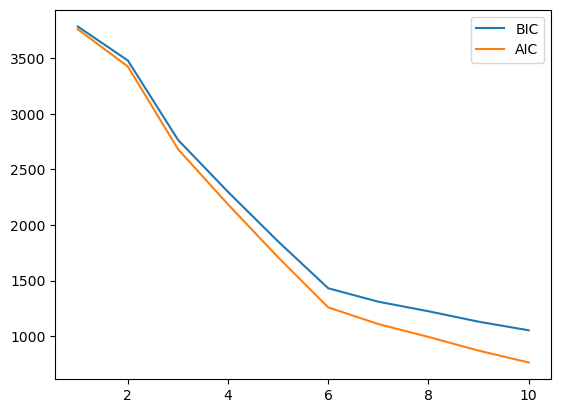

In [20]:
import pandas as pd

k = np.arange(1, 11)
results = {}
for components in k:
    gm = GaussianMixture(n_components=components, n_init=10)
    gm.fit(X)

    results[components] = [gm.bic(X), gm.aic(X)]

score_collection = pd.DataFrame.from_dict(results).T.rename(columns={0: 'BIC', 1: 'AIC'}).plot()

### Likelihood Function

The terms 'probability' and 'likelihood' are often used interchangeably in the English language, but they have very different meanings in statistics.  Given a statistical model with some parameters **$\theta$**, the word 'probability' is used to describe how plausible a future outcome **x** is (knowing the parameter values **$\theta$**), while the word 'likelihood' is used to describe how plausible a particular set of parameter values **$\theta$** are, after the outcome **x** is known.

In short, the PDF is a function of x (with $\theta$ fixed), while the likelihood function is a function of $\theta$ (with x fixed).  

It is important to understand that the likelihood function is *not* a probability distrubtion.

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the ***BayesianGaussianMixture*** class, which is capable of giving weights equal (or close) to zero to unnecessary clusters.  Set the number of clusters ***n_components*** to a value that you have good reason to believe is greater than the optimal number of clusters (this assumed somes minimal knowledge about the problem at hand), and the algorithm with eliminate the uncessary clusters automatically.

The Beta distribution is commonly used to model random variables whose values lie within a fixed range.  The Stick-Breaking Process (SBP) is a good model for datasets where new instances are more likely to join large clusters than small clusters (e.g. people are more likely to move to larger cities). If the concentration $\alpha$ is high the SBP generate many clusters.  Conversely, if the concentration is low there will be few clusters.  Finally, the Wishart distribution is used to sample covariance matrices.

Prior knowledge about the latent variables **z** can be encoded in a probability distribution p(**z**) called the *prior*.  For example, we may have a prior belief that the clusters are likely to be few (low concentration) or conversely, that they are likely to plentiful (high concentration).  This prior belief about the number of clusters can be adjusted using the ***weight_concentration_prior*** hyperparameter.  The more data we have, however, the less the priors matter.

Bayes' theorem tells us how to update the probability distribution over the latent variables after we observe some data **X**.  It computes the *posterior* distribution p(**z**|**X**), which is the conditional probability of **z** given **X**.

$$ p(z|X) = posterior = \frac{\textrm{likelihood x prior}}{\textrm{evidence}} = \frac{p(X|z) p(z)}{p(X)} $$

Unfortunately, in a Gaussian mixture model (and many other problems), the denominator *p*(**X**) is intractable, as it requries integrating over all the possible values of **z**.  This intractablity is one of the central problems in Bayesian statistics, and there are several approaches to solving it.  One of them is *variational inference*, which picks a family of distributions *q*(**z**; **$\lambda$**) with its own *variational parameters* **$\lambda$**, then optimizes these parameters to make *q*(**z**) a good approximation of *p*(**z**|**X**).  This is achieved by finding the value of **$\lambda$** that minimizes the KL divergence from *q*(**z**) to *p*(**z**|**X**).  This is done by maximizing the *evidence lower bound* (ELBO).

In *mean field variational inference*, it is necessary to pick the family of distributions *q*(**z**; **$\lambda$**) and the prior *p*(**z**) very carefully to ensure that the equation for the ELBO simplifies to a form that can be computed.

A simpler approach to maximizing the ELBO is called *black box stochastic variational inference (BBSVI): At each iteration, a few samples are drawn from *q*, and they are used to estimate the gradients of the ELBO with regard to the variational parameters **$\lambda$**, which are then used in a gradient ascent step.

**Gaussian mixture models work great on clusters with ellipsoidal shapes, but if you try to fit a dataset with different shapes you may have bad surprises.**

#### Example 10: BayesianGaussianMixture and Optimal Clusters

In [21]:
from sklearn.mixture import BayesianGaussianMixture

# Non-zero weights represent clusters that are needed. 
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.16, 0.14, 0.09, 0.17, 0.11, 0.11, 0.11, 0.13, 0.  , 0.  ])

### Other Algorithms for Anomaly and Novelty Detection

**PCA (and other dimensionality reduction techniques with an ***inverse_transform()*** method)**

    If you compare the reconstruction error of a normal instance with the reconstruction error of an anomaly, the latter will usually be much larger.  This is a simple and often quite efficient anomaly detection appraoch.

**Fast-MCD (minimum covariance determinant)**

    Implemented by the EllipticEnvelope class, this algorithm is useful for outlier detection, in particular to clean up a dataset.

**Isolation Forest**

    This is an efficient algorithm for outlier detection, especially in high-dimensional datasets.  The algorithm builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a feature randomly, then it picks a random threshold value (between the min and max values) to split the dataset in two.  The dataset gradually gets chopped into pieces this way, until all instances end up isolated from the other instances.  Anomalies are usually far from other instances.

**Local Outlier Factor (LOF)**

    LOF compares the density of instances around a given instance to the density around its neighbors.  An anomaly is often more isolated than its k nearest neighbors.

**One-class SVM**

    This algorithm is better suited for novelty detection.  Since we have just one class of instances, the one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin.  In the original space, this will correspond to finding a small region that encompasses all the instances.  If a new instance does not fall within this region, it is an anomaly.  It works great, especially with high-dimensional datasets, but like all SVMs it does not scale to large datasets.

# Exercises

#### 1. How would you define clustering?  Can you name a few clustering algorithms?

**My Answer:**

    Clustering is the task of assigning similar instances to groups, called clusters.  Three popular clustering algorithms are K-Means , DBSCAN, and Gaussian Mixture Models.  

**Book Answer**

    In machine learning, clustering is the unsupervised task of grouping similar instances together.  The notion of similarity depends on the task at hand: for example, in some cases two nearby instances will be considered simliar, while in others similar instances may be far apart as long as they belong to the same densely packed group.  Popular clustering algorithms include K-Means, DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation, and spectral clustering.

#### 2. What are some of the main applications of clustering algorithms?

**My Answer:**

    Some of the most common applications that come to mind are outlier/novelty detection, label propagation, instance preprocessing, dimensionality reduction, data visualization, and semi-supervised learning

**Book Answer**

    The main applications of clustering algorithms include data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, anomaly detecction, and novelty detection

#### 3. Describe two techniques to select the right number of clusters when using K-Means.

**My Answer:**

    1. Silhouette Diagrams - These are these best method as they provide a clear visual with intuitive rules for determining the optimal cluster amount.
    2. Iteratively plotting the intertia score for various values of k and selecting the value of k which results in the elbow of the plot.  This is more computationally expensive, brute force, and less precise.

**Book Answer**

    The elbow rule is a simple technique to select the number of clusters when using K-Means: just plot the inertia (the mean squared distance from each instance to its nearest centroid) as a function of the number of clusters, and find the point in the curve where the intertia stops dropping fast (the "elbow").  This is generally close to the optimal number of clusters.  Another approach is to plot the silhouette score as a function of the number of clusters.  There will often be a peak, and the optimal number of clusters is generally nearby.  The silhouette score is the mean silhouette coefficient over all instances.  This coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, to -1 for instances that are very close to another cluster.  You may also plot the silhoutte diagrams and perform a more thorough analysis.

#### 4. What is label propagation?  Why would you implement it, and how?

**My Answer:**

    Label propagation is the process in which representative instances for each cluster are used to train a model.  These represent the instances closest to the centroid of the K-Means model for each cluster, respectively.  Once the model is trained, you make predictions on the rest of the dataset.  Best practice is then to remove any edge cases which may be incorrectly labelled and then assign the predictions as the labels for each instance.  This is an example of semi-supervised learning where an unsupervised learning algorithm is first used on an unlabeled dataset to preprocess the dataset for supervised learning.  

**Book Answer**

    Labeling a dataset is costly and time-consuming.  Therefore, it is common to have plenty of unlabeled instances, but few labeled instances.  Label propagation is a technique that consists in copying some (or all) of the labels from the labeled instances to similar unlabeled instaces.  This can greatly extend the number of labeled instances, and thereby allow a supervised algorithm to reach better performance (this is a form of semi-supervised learning).  One approach is to use a clustering algorithm such as K-Means on all the instances, then for each cluster find the most common label or the label of the most representative instance (i.e, the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster.

#### 5. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?

**My Answer:**

    Scalable:
        1. DBSCAN
        2. Minibatch K-Means

    Regions of High Density:
        1. Bayesian Gaussian Mixture Models
        2. DBSCAN

**Book Answer**

    K-Means and BIRCH scale well to large datasets.  DBSCAN and Mean-Shift look for regions of high density.

#### 6. Can you think of a use case where active learning would be useful? How would you implement it?

**My Answer:**

    Active learning is the process in which models are improved with human interaction.  In short, the model is trained and makes predictions.  The incorrect predictions are isolated and a human expert corrects them.  This new dataset is then used as the training set the process is repeated until performance gains are neglible.  In my opinion this is a beneficial step to any model development whenever a human expert can correctly classify instances with near-perfect certainty.  Implementing should be as straightforward as providing the expert with the instances that the model got wrong, tell them what the model thought it was, and have them relabel these instances correctly.  Then append these updated instances to the prediction dataset (which should be composed of all correctly labelled instances) and continue this loop until the model stops performing better.

**Book Answer**

    Active learning is useful whenever you have plenty of unlabeled instances but labeling is costly.  In this case (which is very common), rather than randomly selecting instances to label, it is often preferable to perform active learning, where human experts interact with the learning algorithm, providing labels for specific instances when the algorithm requests them.  A common approach is uncertainty sampling.

#### 7. What is the difference between anomaly detection and novelty detection?

**My Answer:**

    The two are essentially the same thing except novelty detection assumes the dataset is already cleaned of all anamalies/outliers.  In this case, any remaining "outlier" is a novelty.

**Book Answer**

    Many people use the terms anomaly detection and novelty detection interchangeably, but they are not exactly the same.  In anomaly detection, the algorithm is trained on a dataset that may contain outliers, and the goal is typically to identify these outliers (within the training set), as well as outliers among new instances.  In novelty detection, the algorithm is trained on a dataset that is presumed to be "clean" and the objective is to detect novelties strictly among new instances.  Some algorithms work best for anomaly detection (e.g. Isolation Forest), while others are better suited for novelty detection (one-class SVM).

#### 8. What is a Gaussian mixture?  What tasks can you use it for?

**My Answer:**

A *Gaussian Mixture Model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.  All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.  There are several GMM variants.  In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number *k* of Gaussian distributions.

Common applications are clustering (best when the clusters are elliptical or spherical in shape), sampling new datapoints, and anomaly detection.

**Book Answer**

    A Guassian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown.  In other words, the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don't know which cluster each instance belongs to.  This model is useful for density estimation, clustering, and anomaly detection.

#### 9. Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?

**My Answer:**

You can try to find the model that minimizes a *theoretical information criteria*, such as the *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC).  Both the BIC and the AIC penalize models that have more parameters to learn (e.g. more clusters) and reward models that fit the data well.  **They often end up selecting the same model.  When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite well (this is especially true for larger datasets).**

To compute the BIC and AIC, call the bic() and aic() methods.  To determine the optimal number of clusters, plot these scores for various values of *k* and select the lowest.

**Book Answer**

    One way to find the right number of clusters when using a Gaussian mixture model is to plot the Bayesian information criterion (BIC) or the Akaike information criterion (AIC) as a function of the number of clusters, then choose the number of clusters that minimizes the BIC or AIC.  Another technique is to use a Bayesian Guassian mixture model, which automatically selects the number of clusters.

#### 10. The class Olivetti faces dataset contains 400 grayscale 64 x 64 pixel images of faces.  Each image is flattened to a 1D vector of size 4096 x 1.  40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture.

    a. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1).
    
    b. Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.
    
    c. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).
    
    d. Visualize the clusters: do you see similar faces in each cluster?

36
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


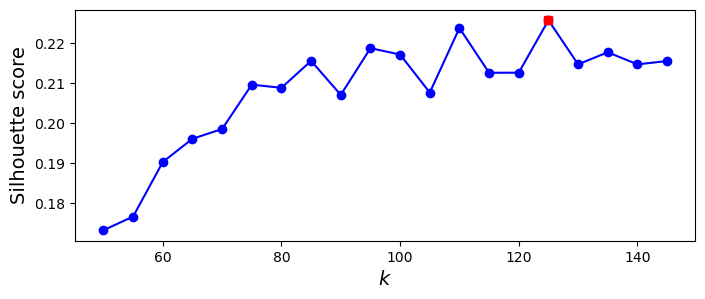

Optimal clusters:  125
Cluster 0


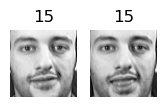

Cluster 1


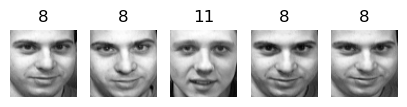

Cluster 2


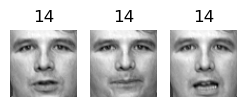

Cluster 3


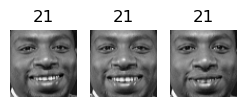

Cluster 4


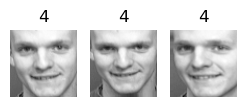

Cluster 5


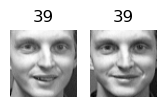

Cluster 6


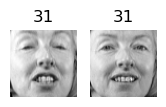

Cluster 7


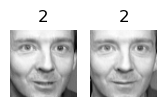

Cluster 8


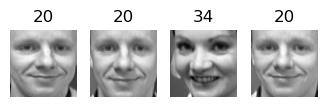

Cluster 9


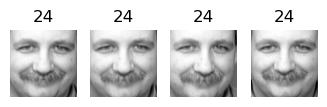

Cluster 10


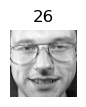

Cluster 11


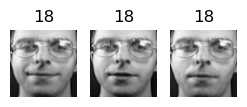

Cluster 12


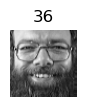

Cluster 13


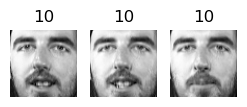

Cluster 14


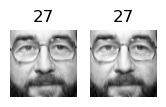

Cluster 15


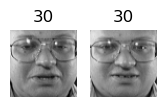

Cluster 16


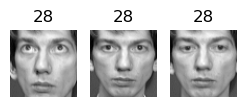

Cluster 17


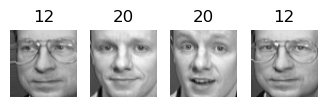

Cluster 18


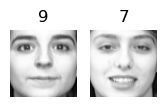

Cluster 19


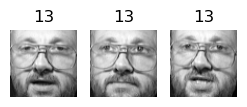

Cluster 20


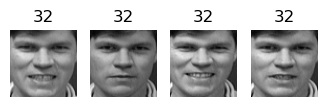

Cluster 21


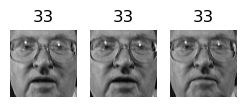

Cluster 22


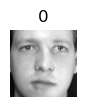

Cluster 23


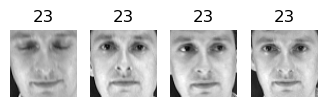

Cluster 24


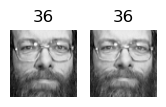

Cluster 25


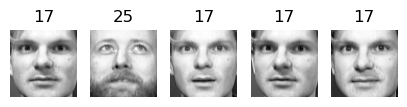

Cluster 26


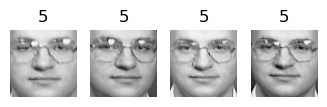

Cluster 27


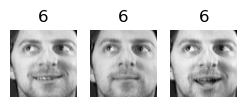

Cluster 28


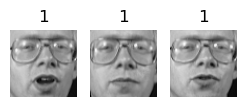

Cluster 29


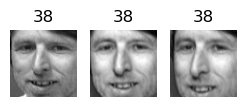

Cluster 30


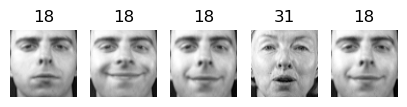

Cluster 31


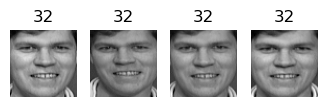

Cluster 32


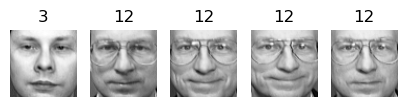

Cluster 33


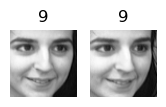

Cluster 34


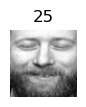

Cluster 35


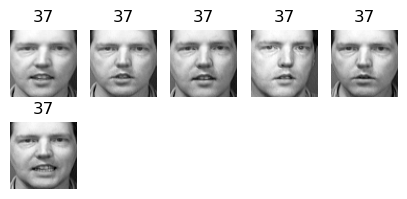

Cluster 36


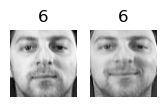

Cluster 37


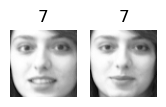

Cluster 38


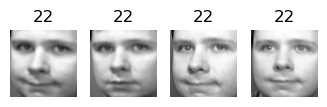

Cluster 39


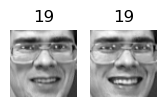

Cluster 40


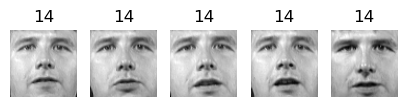

Cluster 41


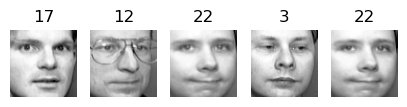

Cluster 42


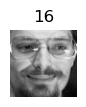

Cluster 43


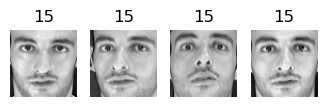

Cluster 44


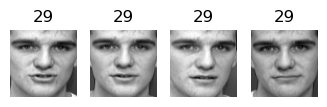

Cluster 45


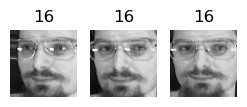

Cluster 46


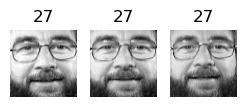

Cluster 47


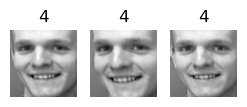

Cluster 48


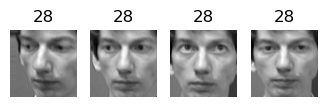

Cluster 49


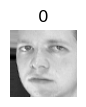

Cluster 50


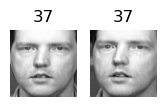

Cluster 51


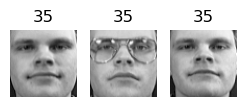

Cluster 52


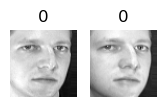

Cluster 53


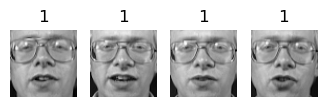

Cluster 54


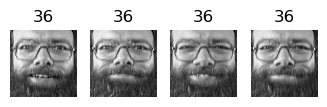

Cluster 55


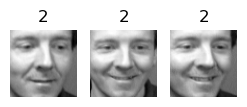

Cluster 56


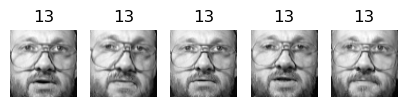

Cluster 57


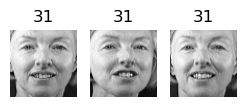

Cluster 58


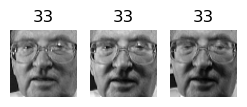

Cluster 59


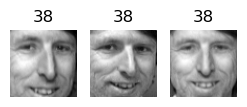

Cluster 60


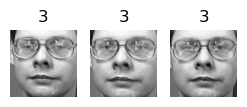

Cluster 61


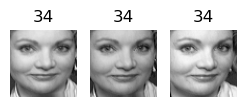

Cluster 62


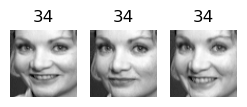

Cluster 63


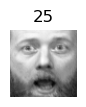

Cluster 64


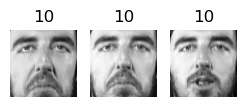

Cluster 65


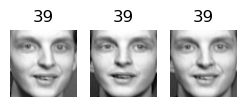

Cluster 66


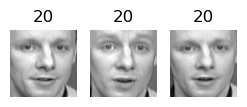

Cluster 67


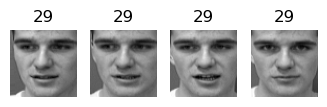

Cluster 68


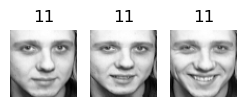

Cluster 69


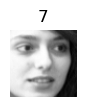

Cluster 70


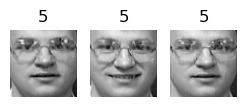

Cluster 71


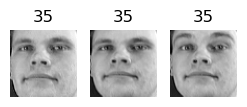

Cluster 72


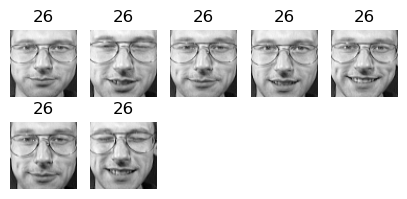

Cluster 73


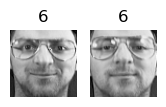

Cluster 74


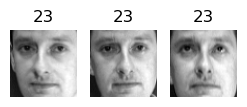

Cluster 75


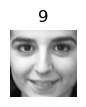

Cluster 76


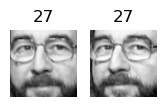

Cluster 77


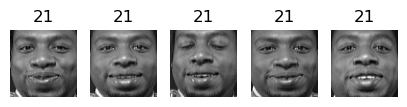

Cluster 78


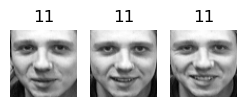

Cluster 79


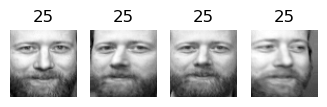

Cluster 80


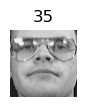

Cluster 81


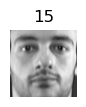

Cluster 82


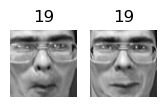

Cluster 83


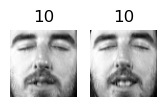

Cluster 84


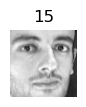

Cluster 85


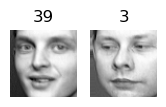

Cluster 86


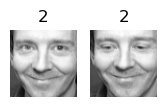

Cluster 87


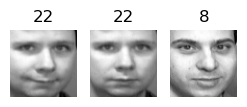

Cluster 88


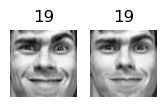

Cluster 89


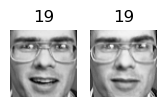

Cluster 90


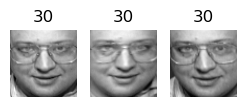

Cluster 91


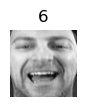

Cluster 92


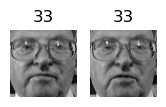

Cluster 93


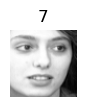

Cluster 94


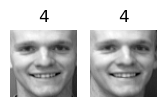

Cluster 95


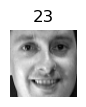

Cluster 96


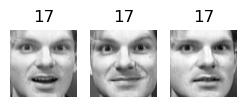

Cluster 97


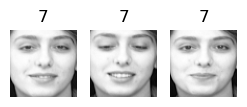

Cluster 98


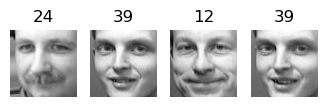

Cluster 99


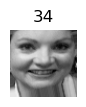

Cluster 100


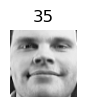

Cluster 101


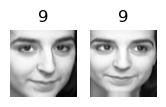

Cluster 102


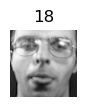

Cluster 103


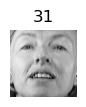

Cluster 104


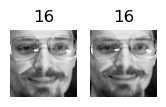

Cluster 105


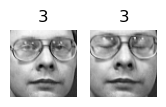

Cluster 106


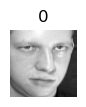

Cluster 107


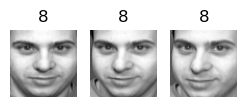

Cluster 108


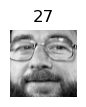

Cluster 109


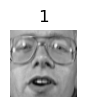

Cluster 110


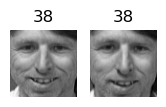

Cluster 111


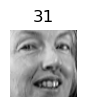

Cluster 112


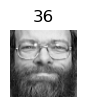

Cluster 113


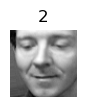

Cluster 114


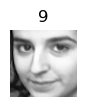

Cluster 115


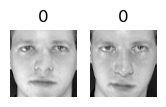

Cluster 116


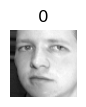

Cluster 117


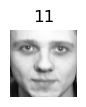

Cluster 118


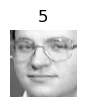

Cluster 119


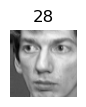

Cluster 120


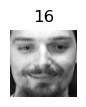

Cluster 121


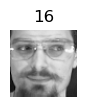

Cluster 122


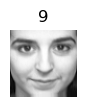

Cluster 123


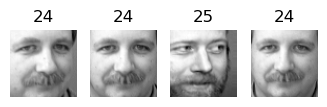

Cluster 124


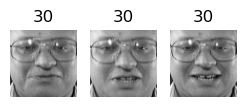

In [22]:
' I initially chose to use a silhouette diagram and decided that 5 clusters was enough.  However, the book answer showed an optimal cluster size of 125.  So I decided to use their method.'
' I also wasnt sure the best way to visualize the data, so I used what the book did.  I did not finish this exercise on my own and required a lot of heavy lifting from looking at the answer.'

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data and initialize classes
data = fetch_olivetti_faces()
shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

# Split data in train, val and test sets
for train_index, test_index in shuffle_split.split(data.data, data.target):
    X_train, X_test = data.data[train_index], data.data[test_index]
    y_train, y_test = data.target[train_index], data.target[test_index]

for train_index, test_index in shuffle_split.split(X_train, y_train):
    X_train, X_val = X_train[train_index], X_train[test_index]
    y_train, y_val = y_train[train_index], y_train[test_index]

# Apply PCA for performance
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)

# Use a silhouette score to determine the optimal number of clusters
k_range = range(50, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()
print('Optimal clusters: ', best_k)

# Train the model
kmeans_clf = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_train)

# Visualize the faces
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kmeans_clf.labels_):
    print("Cluster", cluster_id)
    in_cluster = kmeans_clf.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

#### 11. Continuing with the Olivetti faces dataset:
    
    a. Train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.
    
    b. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.  Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?
    
    c. What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?

In [23]:
# Train a logistic regression model to compare against
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Logistic Regression: ', log_reg.score(X_val, y_val))

# Create a Pipeline that clusters the dataset before training a logistic regression model
pipeline = Pipeline([
    ('pca', PCA(0.99)),
    ('kmeans', KMeans(n_clusters=150, n_init=10, random_state=42)),
    ('log_reg', LogisticRegression())
])
pipeline.fit(X_train, y_train)
print('Logistic Regression + PCA + KMeans DR: ', pipeline.score(X_val, y_val))

# Use grid search to optimize k
param_grid = dict(kmeans__n_clusters=range(125, 185))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs= -1)
grid_clf.fit(X_train, y_train)
print('Optimum clusters: ', grid_clf.best_params_)

op_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=grid_clf.best_params_.get('kmeans__n_clusters'), n_init=10, random_state=42)),
    ('log_reg', LogisticRegression())
])
op_pipeline.fit(X_train, y_train)
print('Optimized DR: ', op_pipeline.score(X_val, y_val))

# Expanded dataset
X = np.concatenate([X_train, X_val])
y = np.concatenate([y_train, y_val])
kmeans_features = KMeans(n_clusters=grid_clf.best_params_.get('kmeans__n_clusters'), n_init=10, random_state=42).fit_transform(X)
data_expanded = np.concatenate([kmeans_features, X], axis=1)

# Re-split data into train and val sets
for train_index, test_index in shuffle_split.split(data_expanded, y):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

# Finally, use grid search to optimize k
param_grid = dict(kmeans__n_clusters=range(125, 185))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs= -1)
grid_clf.fit(X_train, y_train)
print('Optimum clusters: ', grid_clf.best_params_)

ex_op_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=grid_clf.best_params_.get('kmeans__n_clusters'), n_init=10, random_state=42)),
    ('log_reg', LogisticRegression())
])
ex_op_pipeline.fit(X_train, y_train)
print('Optimized DR with Expanded Features: ', ex_op_pipeline.score(X_val, y_val))
print('Final performance: ', ex_op_pipeline.score(X_test, y_test))

Logistic Regression:  0.975
Logistic Regression + PCA + KMeans DR:  0.875
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Optimum clusters:  {'kmeans__n_clusters': 173}
Optimized DR:  0.925
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Optimum clusters:  {'kmeans__n_clusters': 133}
Optimized DR with Expanded Features:  0.95
Final performance:  0.85


#### Book Answer

199
k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


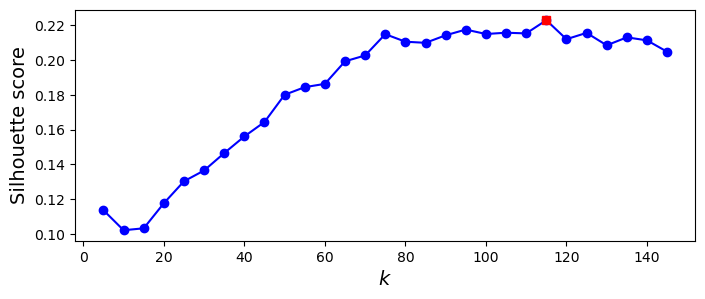

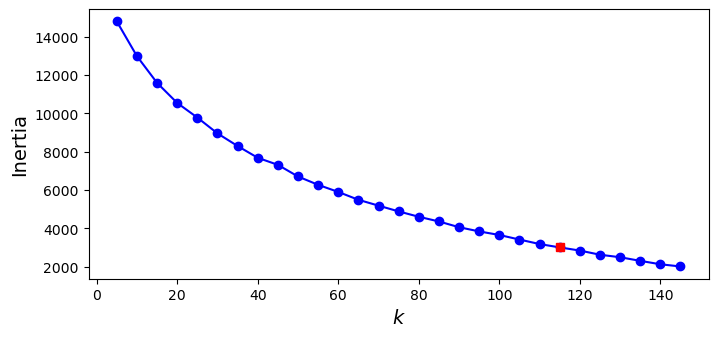

0.9
0.7125
5 0.3875
10 0.4875
15 0.5875
20 0.6125
25 0.6375
30 0.6125
35 0.7125
40 0.6875
45 0.7375
50 0.725
55 0.725
60 0.725
65 0.7
70 0.7125
75 0.7375
80 0.7625
85 0.7
90 0.75
95 0.75
100 0.75
105 0.7625
110 0.75
115 0.7125
120 0.7875
125 0.7625
130 0.75
135 0.7625
140 0.7125
145 0.725


0.8375

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

olivetti = fetch_olivetti_faces()

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]
    
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

print(pca.n_components_)

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

best_model = kmeans_per_k[best_index]

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
print(clf.score(X_valid_pca, y_valid))

X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
print(clf.score(X_valid_reduced, y_valid))

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

#### 12. Train a Gaussian mixture model on the Olivetti faces dataset.  To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).

    a. Use the model to generate some new faces (using the sample() method)
    
    b. Visualize them (if you used PCA, you will need to use its inverse_transform() method).
    
    c. Modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e. compare the output of the score_samples() method for normal images and for anomalies).

I think 4 clusters looks like the best-of-both worlds based on this BIC/AIC plot


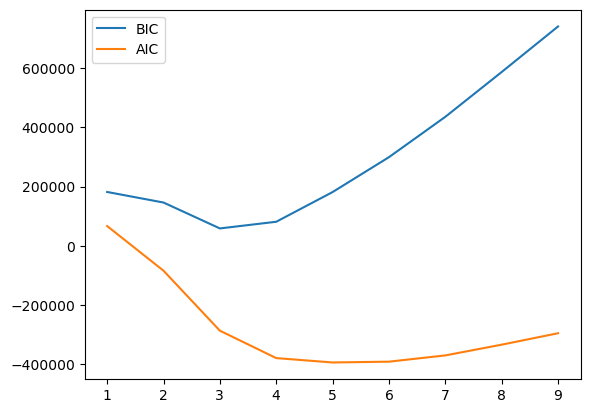

In [25]:
# Load data and initialize classes
data = fetch_olivetti_faces()
shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)

# Split data in train, val and test sets
for train_index, test_index in shuffle_split.split(data.data, data.target):
    X_train, X_test = data.data[train_index], data.data[test_index]
    y_train, y_test = data.target[train_index], data.target[test_index]

# Determine the optimal k
k = np.arange(1, 10, 1)
X = PCA(0.99).fit_transform(X_train)
results = {}
for components in k:
    gm = GaussianMixture(n_components=components, n_init=10, random_state=42)
    gm.fit(X)
    results[components] = [gm.bic(X), gm.aic(X)]

score_collection = pd.DataFrame.from_dict(results).T.rename(columns={0: 'BIC', 1: 'AIC'}).plot()
print('I think 4 clusters looks like the best-of-both worlds based on this BIC/AIC plot')

In [26]:
# Create a pipeline for best-practice
pipeline = Pipeline([
    ('pca', PCA(0.99)),
    ('gm', GaussianMixture(n_components=4, n_init=10, random_state=42)),
])
pipeline.fit(X_train, y_train)

# Create new instances
X_new, y_new = pipeline.named_steps['gm'].sample(5)
X_new = pipeline.named_steps['pca'].inverse_transform(X_new)

Cluster 0


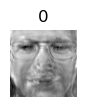

Cluster 1


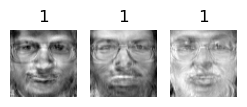

Cluster 2


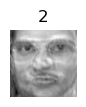

In [27]:
# Visualize the faces
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(y_new):
    print("Cluster", cluster_id)
    in_cluster = y_new==cluster_id
    faces = X_new[in_cluster]
    labels = y_new[in_cluster]
    plot_faces(faces, labels)

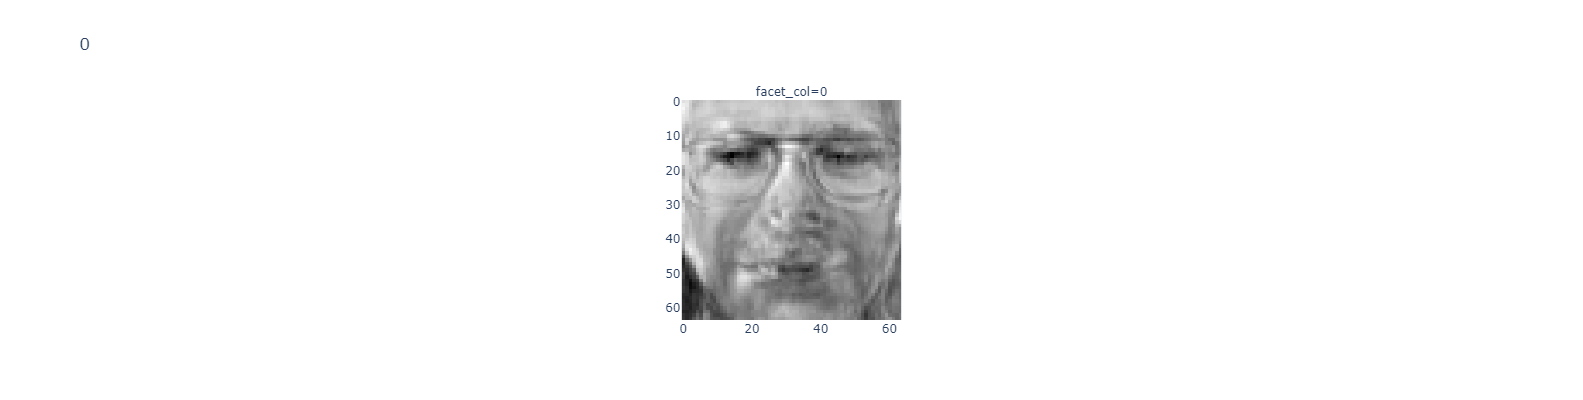

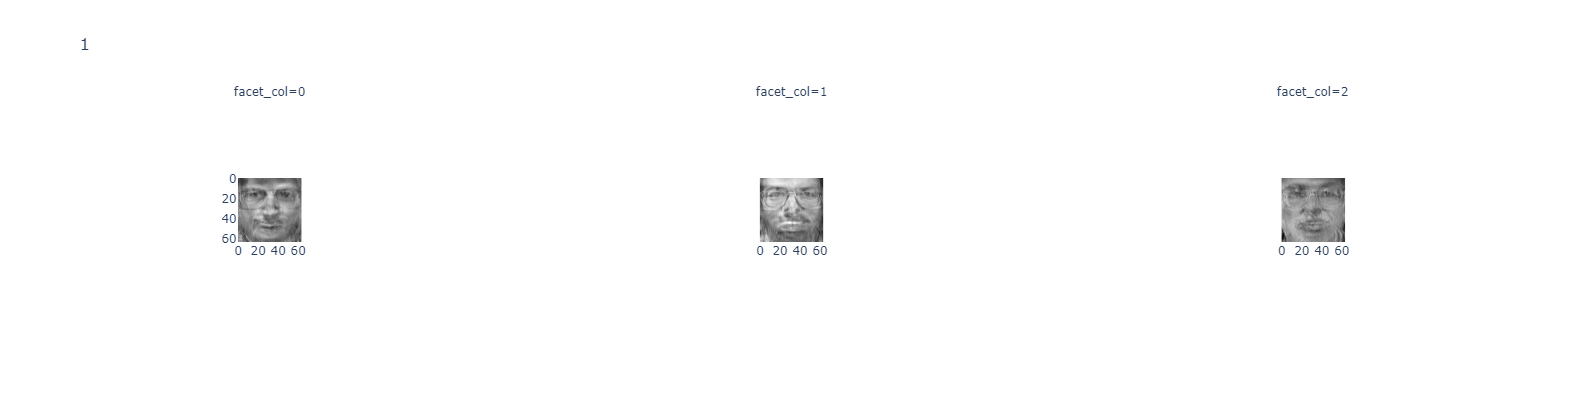

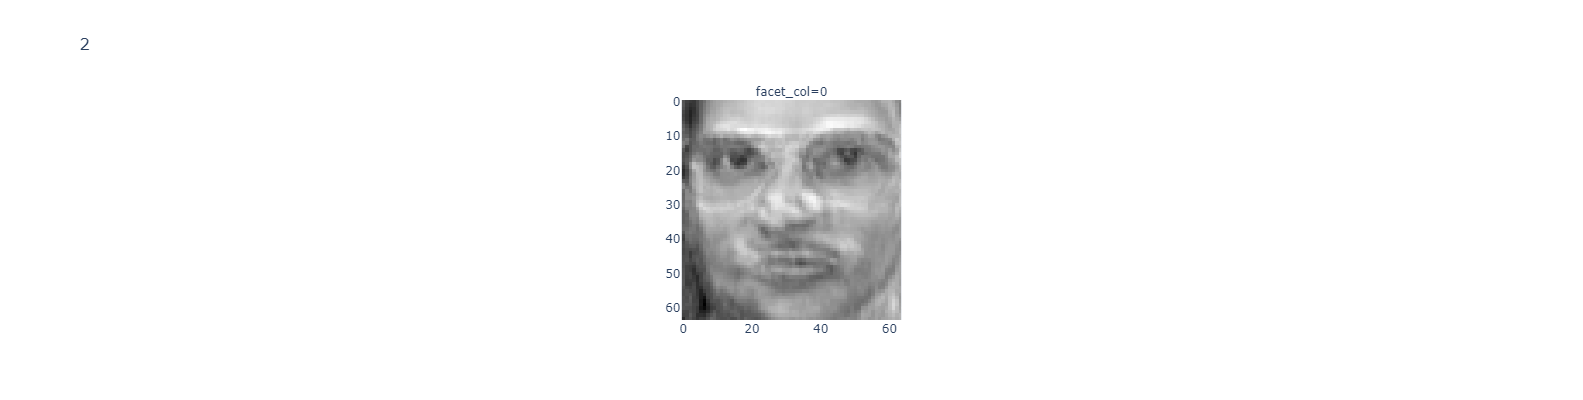

In [28]:
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

imgs_by_cluster ={}
max_cols = 0

# Group images by cluster
for cluster in set(y_new):
    if cluster not in imgs_by_cluster.keys():
        imgs_by_cluster[cluster] = None

    idx = y_new == cluster
    imgs_by_cluster[cluster] = X_new[idx].reshape(-1, 64, 64)
    if imgs_by_cluster[cluster].shape[0] > max_cols:
        max_cols = imgs_by_cluster[cluster].shape[0]
        
   
# Display the image
for cluster, faces in imgs_by_cluster.items():
        fig = px.imshow(
            faces,
            binary_string =True,
            title=str(cluster),
            width=400,
            height=400,
            facet_col=0,
            facet_col_wrap=faces.shape[0],
            facet_row_spacing=0.1,
            facet_col_spacing=0.1
        )
        fig.show()


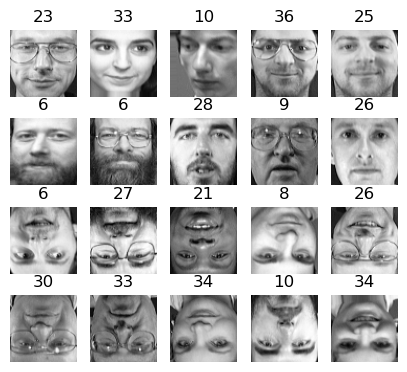

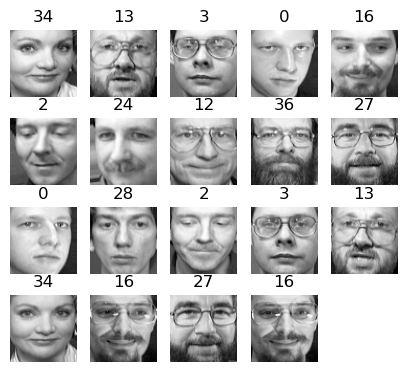

The flipped images werent considered anomalies.
[849.61319673 995.90791963 900.08311709 822.35109374 822.35118698
 900.08301775 849.61301269 995.90788809 822.35118609 900.0830397 ] [900.08303978 822.35118616 995.90788809 849.61301269 900.08301775
 822.35118698 822.35109374 900.08311709 995.90791958 849.61319677]


In [29]:
# Flip some images left-right and up-down
modified_images = X_train[:20].copy()
modified_images[:10] = np.flip(modified_images[:10], axis=0)
modified_images[10:] = np.flip(modified_images[10:], axis=1)
modified_labels = y_train[:20]

# Plot to verify intended results
plot_faces(modified_images, modified_labels)

# Add these images to the training set
X_train_, y_train_ = np.append(X_train, modified_images, axis=0), np.append(y_train, modified_labels, axis=0)

# Re-fit the pipeline
pipeline.fit(X_train_, y_train_)

# Generate score samples
pipeline.score_samples(X_train_)

# Determine the index of anomalies
densities = pipeline.score_samples(X_train_)
density_threshold = np.percentile(densities, 5)
anomalies = (densities < density_threshold).nonzero()

# Plot to verify intended results
plot_faces(X_train_[densities < density_threshold], y_train_[anomalies])

print('The flipped images werent considered anomalies.')
print(pipeline.score_samples(X_train_[:10]), pipeline.score_samples(modified_images[:10]))

#### Book Answer

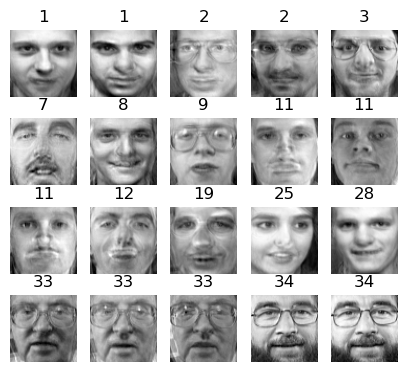

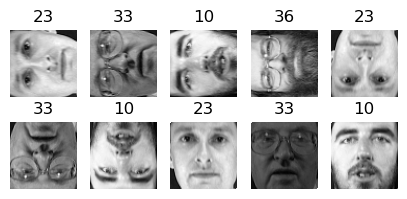

[-3.05062723e+07 -2.20110231e+07 -3.64312069e+07 -5.30079965e+07
 -2.19525126e+07 -2.81824894e+07 -5.09450294e+07 -8.26634962e+07
 -1.04357416e+08 -7.03827785e+07]
[1163.02021055 1112.17308179 1156.32132919 1170.67602817 1073.69246192
 1139.89252909 1113.7663003  1073.69244953 1048.17523003 1048.17520886]


In [30]:
gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

plot_faces(gen_faces, y_gen_faces)

n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

X_bad_faces_pca = pca.transform(X_bad_faces)

print(gm.score_samples(X_bad_faces_pca))
print(gm.score_samples(X_train_pca[:10]))

#### 13. Some dimensionality reduction techniques can also be used for anomaly detection.  For example:

    a. Take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance.
    
    b. Then compute the reconstruction error for each image.

    c. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is.

    d. Plot a reconstructed image to see why: it tries to reconstruct a normal face.

In [31]:
data = fetch_olivetti_faces()
pca = PCA(0.99)
pca_data = pca.fit_transform(data.data)
pca_targets = data.target

In [32]:
reconstructed_pca_data = pca.inverse_transform(pca_data)

In [33]:
reconstructed_pca_data[:20].reshape(-1, 64, 64)

array([[[0.34841526, 0.39315593, 0.41771007, ..., 0.37619266,
         0.37286252, 0.3285917 ],
        [0.35478413, 0.409519  , 0.42977262, ..., 0.3827648 ,
         0.3483498 , 0.32182792],
        [0.34749195, 0.3965701 , 0.43832114, ..., 0.37481493,
         0.36166763, 0.29388   ],
        ...,
        [0.20838039, 0.213427  , 0.2038909 , ..., 0.17589721,
         0.17115916, 0.19109726],
        [0.21410473, 0.22791362, 0.21188088, ..., 0.1565697 ,
         0.15624757, 0.19016165],
        [0.19201913, 0.23061852, 0.20820826, ..., 0.17516087,
         0.14948067, 0.16961147]],

       [[0.4619232 , 0.49687126, 0.5133084 , ..., 0.1958446 ,
         0.20213725, 0.2014216 ],
        [0.4437675 , 0.50350565, 0.53062654, ..., 0.20163287,
         0.2071181 , 0.2102909 ],
        [0.48093283, 0.5290947 , 0.5457888 , ..., 0.19673927,
         0.19158107, 0.19059703],
        ...,
        [0.7844263 , 0.7360734 , 0.7907251 , ..., 0.14828697,
         0.15383992, 0.14672221],
        [0.7

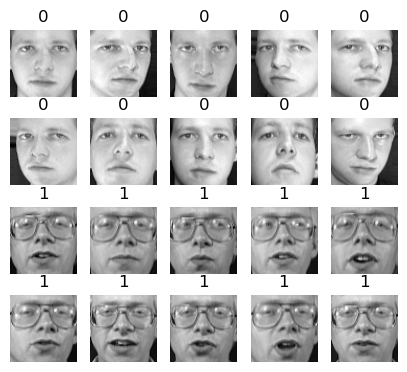

In [34]:
plot_faces(data.data[:20].reshape(-1, 64, 64), pca_targets[:20])

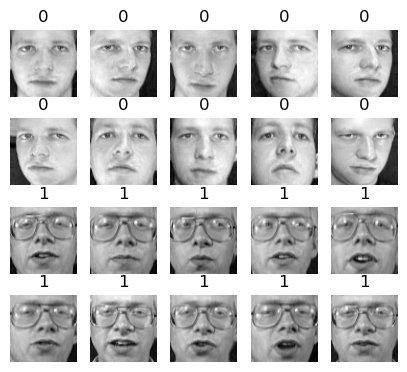

In [35]:
plot_faces(reconstructed_pca_data[:20].reshape(-1, 64, 64), pca_targets[:20])

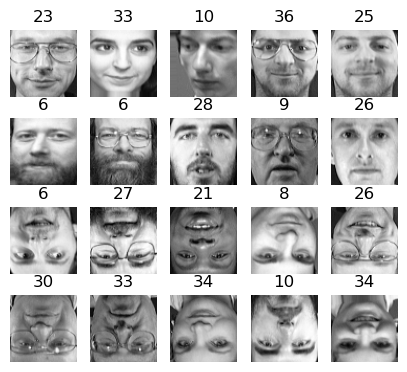

In [36]:
plot_faces(modified_images[:20].reshape(-1, 64, 64), modified_labels[:20])

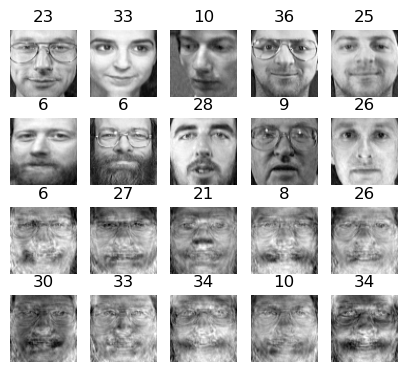

In [41]:
pca_modified_images = pca.transform(modified_images)
reconstructed_modified_images = pca.inverse_transform(pca_modified_images)
plot_faces(reconstructed_modified_images[:20].reshape(-1, 64, 64), modified_labels[:20])

#### Book Answer

0.00019049898
0.0049963123


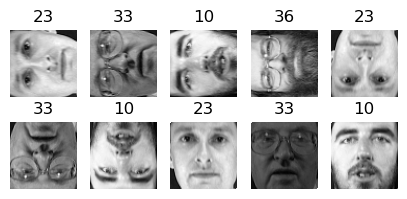

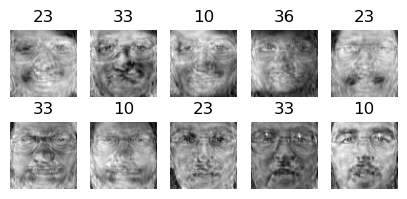

In [40]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_bad_faces_pca = pca.transform(X_bad_faces)

print(reconstruction_errors(pca, X_train).mean())
print(reconstruction_errors(pca, X_bad_faces).mean())
plot_faces(X_bad_faces, y_bad)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)